## TMA4195 - SIMPLE ATMOSPHERIC MODELS RELATED TO GLOBAL WARMING

Group 3: Candidate numbers: 10256, 10354, 10316, 10271, 10182

In [28]:
import numpy as np
import scipy as sp
import math
import matplotlib.pyplot as plt

In [29]:

P0S = 341.3   # averaged solar flux in W m−2
CC  = 0.66     # Cloud cover in %
rSM = 0.1065   # sw molecular scattering coefficient in %
rSC = 0.220*CC    # sw cloud scattering coefficient in %
rSE = 0.170    # sw Earth reflectivity in %
aO3 = 0.080     # sw absorptivity: ozone in %
aSC = 0.1239*CC   # sw cloud absorptivity in %
aSW = 0.1451   # sw absorptivity: H2O-CO2-CH4 in %
rLC = 0.195*CC    # lw cloud scattering coefficient in %
rLE = 0.0     # lw Earth reflectivity in %
aLC = 0.622*CC    # lw cloud absorptivity in %
aLW = 0.8258   # lw absorptivity: H2O-CO2-CH4-O3 in %
epsilonE = 1.00    # Earth emissivity in % (εE = 1 - rLE)
epsilonA = 0.875     # atmospheric emissivity in %
fA = 0.618     # asymmetry factor in %
alpha = 3         # sensible heat flux in W m−2 K−1
beta = 4          # latent heat flux in W m−2 K−1
sigma = 5.67*10**(-8)

In [128]:
A_clear = np.array([
#      P0S      P1       P2       P2r       P3      P4       P4r      P5       P6       P6r      P7    
    [   1   ,    0   ,    0   ,    0   ,    0   ,    0   ,    0   ,    0   ,    0   ,    0   ,    0   ], # P0S
    [(1-aO3),   -1   ,    0   ,    0   ,    0   ,    0   ,    0   ,    0   ,    0   ,    0   ,    0   ], # P1
    [   0   , (1-rSM),   -1   ,    0   ,    0   ,    0   ,    0   ,    0   ,    0   ,    0   ,    0   ], # P2
    [   0   ,   rSM  ,    0   ,   -1   ,    0   ,    0   ,    0   ,    0   ,    0   ,    0   ,    0   ], # P2r
    [   0   ,    0   , (1-aSW),    0   ,   -1   ,    0   ,    0   ,    0   ,    0   , (1-aSW),    0   ], # P3
    [   0   ,    0   ,    0   ,    0   , (1-rSE),   -1   ,    0   ,    0   ,    0   ,    0   ,    0   ], # P4
    [   0   ,    0   ,    0   ,    0   ,   rSE  ,    0   ,   -1   ,    0   ,    0   ,    0   ,    0   ], # P4r
    [   0   ,    0   ,    0   ,    0   ,    0   ,    0   , (1-aSW),   -1   ,    0   ,    0   ,    0   ], # P5
    [   0   ,    0   ,    0   ,    0   ,    0   ,    0   ,    0   , (1-rSM),   -1   ,    0   ,    0   ], # P6
    [   0   ,    0   ,    0   ,    0   ,    0   ,    0   ,    0   ,   rSM  ,    0   ,   -1   ,    0   ], # P6r
    [   0   ,    0   ,    0   , (1-aO3),    0   ,    0   ,    0   ,    0   , (1-aO3),    0   ,   -1   ]  # P7
])

A_cloudy_SW = np.array([
#      P0S     P1      P2      P2r     P3      P4      P4r     P5      P6      P6r     P7      P8      P7r     P9      P10     P10r    P11   
    [   1   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ], # P0S
    [(1-aO3),  -1   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ], # P1
    [   0   ,(1-rSM),  -1   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ], # P2
    [   0   ,  rSM  ,   0   ,  -1   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ], # P2r
    [   0   ,   0   ,(1-aSW),   0   ,  -1   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,(1-aSW),   0   ], # P3
    [   0   ,   0   ,   0   ,   0   ,(1-rSC),  -1   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ], # P4
    [   0   ,   0   ,   0   ,   0   ,  rSC  ,   0   ,  -1   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ], # P4r
    [   0   ,   0   ,   0   ,   0   ,   0   ,(1-aSC),   0   ,  -1   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ], # P5
    [   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,(1-rSE),  -1   ,   0   ,   0   ,   0   ,(1-rSE),   0   ,   0   ,   0   ,   0   ], # P6
    [   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,  rSE  ,   0   ,  -1   ,   0   ,   0   ,  rSE  ,   0   ,   0   ,   0   ,   0   ], # P6r
    [   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,(1-rSC),  -1   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ], # P7
    [   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,  rSC  ,   0   ,   0   ,  -1   ,   0   ,   0   ,   0   ,   0   ], # P7r
    [   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,(1-aSC),  -1   ,   0   ,   0   ,   0   ,   0   ,   0   ], # P8
    [   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,(1-aSW),   0   ,   0   ,   0   ,   0   ,(1-aSW),   0   ,  -1   ,   0   ,   0   ,   0   ], # P9
    [   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,(1-rSM),  -1   ,   0   ,   0   ], # P10
    [   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,  rSM  ,   0   ,  -1   ,   0   ], # P10r
    [   0   ,   0   ,   0   ,(1-aO3),   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,   0   ,(1-aO3),   0   ,  -1   ]  # P11
])

### Temperature without clouds

In [129]:
P_sol = np.array([P0S, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]) # Initialize with solar constant
P = np.linalg.solve(A_clear,P_sol) # Solve to find all P-equations
P1, P2, P2r, P3, P4, P4r, P5, P6, P6r, P7 = P[1:] # Remove P0S, not used in further calculations
print("P4", P4)
def equations(vars):
    '''
    Returns the balance equations, set equal to zero
    '''
    TA, TE = vars
    eq1 = ( (1+fA)*epsilonA * sigma* TA**4 # Out: Emitted energy from atmosphere
           - (alpha + beta)*(TE - TA)      # In: Sensible heat flux and latent heat flux
           - aO3*(P0S + P2r + P6)          # In: sw energy absorbed by ozone-layer, from sun and earth reflection
           - aSW*(P2 + P6r + P4r)          # In: sw energy absorbed by greenhouse gases, from sun and earth reflection
           - aLW*epsilonE*sigma*TE**4      # In: lw energy absorbed by greenhouse gases and ozone, emitted by earth
           )

    eq2 = ( epsilonE*sigma*TE**4           # Out: lw emitted energy from earth
           + (alpha + beta)*(TE - TA)      # Out: Sensible heat flux and latent heat flux
           - epsilonA*sigma*TA**4          # In: lw emitted energy from atmosphere
           - P4                            # In: sw energy absorbed by earth
           )

    return [eq1, eq2]

# Initial guess for x and y in Kelvin
initial_guess = [300, 300]

# Solve the system numerically
solution = sp.optimize.fsolve(equations, initial_guess)
TA, TE = solution

print(f"Solution for TA: {TA-273:.2f} °C")
print(f"Solution for TE: {TE-273:.2f} °C")

absEarth =  epsilonA*sigma*TA**4 + P4
absAtm = -((alpha + beta)*(TE - TA)      # In: Sensible heat flux and latent heat flux
           - aO3*(P0S + P2r + P6)          # In: sw energy absorbed by ozone-layer, from sun and earth reflection
           - aSW*(P2 + P6r + P4r)          # In: sw energy absorbed by greenhouse gases, from sun and earth reflection
           - aLW*epsilonE*sigma*TE**4
           )

print(f'Absorbed energy by Earth: {absEarth:.3f} J/(m^2 s)') 
print(f'Absorbed energy by Atmosphere: {absAtm:.3f} J/(m^2 s)')

P4 201.74234929146021
Solution for TA: 12.54 °C
Solution for TE: 24.79 °C
Absorbed energy by Earth: 531.561 J/(m^2 s)
Absorbed energy by Atmosphere: 362.244 J/(m^2 s)


### Temprature with clouds

In [130]:
P_sol_cloudy_SW = np.array([P0S, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]) # Initialize with solar constant
P_CC_SW = np.linalg.solve(A_cloudy_SW,P_sol_cloudy_SW) # Solve to find all P-equations
P1_SW, P2_SW, P2r_SW, P3_SW, P4_SW, P4r_SW, P5_SW, P6_SW, P6r_SW, P7_SW, P8_SW, P8r_SW, P9_SW, P10_SW, P10r_SW, P11_SW = P_CC_SW[1:]

def equations_CC(vars):
    TA, TE = vars
    eq1 = ( (1+fA)*epsilonA * sigma* TA**4             # Out: Emitted energy from atmosphere
           - aO3*(P0S + P2r_SW + P10_SW)               # In: sw energy absorbed by ozone, from sun and earth reflection
           - aSW*(P2_SW + P8_SW + P4r_SW + P10r_SW)    # In: sw energy absorbed by greenhouse gases, from sun and earth reflection
           - aSC*(P4_SW + P8r_SW + P6r_SW)             # In: sw energy absorbed by clouds, from sun and earth reflection
           - (alpha + beta)*(TE - TA)                  # In: Sensible heat flux and latent heat flux
           - aLW*(1-aLC)*(1-rLC)*epsilonE*sigma*TE**4  # In: lw absorbed by greenhouse gasses and ozone from Earth
           - aLC*(1-rLC)*epsilonE*sigma*TE**4          # In: lw not reflected by clouds, absorbed by clouds from Earth    
    )

    eq2 =( epsilonE*sigma*TE**4                        # Out: Emitted energy from earth
          + (alpha + beta)*(TE - TA)                   # Out: Total energy transport due to temperatures
          - P6_SW                                      # In: sw energy absorbed by earth
          - rLC*epsilonE*sigma*TE**4                   # In: lw reflected by clouds from Earth
          - epsilonA*sigma*TA**4                       # In: Emitted energy from atmosphere
    )
    
    return [eq1, eq2]

# Initial guess for x and y
initial_guess = [300, 300]

# Solve the system numerically
solution = sp.optimize.fsolve(equations_CC, initial_guess)
TA_CC, TE_CC = solution

print(P6_SW)

print(f"Solution for TA: {(TA_CC-273):.2f} °C")
print(f"Solution for TE: {(TE_CC-273):.2f} °C")

absEarth = -(- P6_SW                                      # In: sw energy absorbed by earth
           - rLC*epsilonE*sigma*TE_CC**4                   # In: lw reflected by clouds from Earth
           - epsilonA*sigma*TA_CC**4)
absAtmo = -( - aO3*(P0S + P2r_SW + P10_SW)               # In: sw energy absorbed by ozone, from sun and earth reflection
           - aSW*(P2_SW + P8_SW + P4r_SW + P10r_SW)    # In: sw energy absorbed by greenhouse gases, from sun and earth reflection
           - aSC*(P4_SW + P8r_SW + P6r_SW)             # In: sw energy absorbed by clouds, from sun and earth reflection
           - (alpha + beta)*(TE - TA)                  # In: Sensible heat flux and latent heat flux
           - aLW*(1-aLC)*(1-rLC)*epsilonE*sigma*TE**4  # In: lw absorbed by greenhouse gasses and ozone from Earth
           - aLC*(1-rLC)*epsilonE*sigma*TE**4          # In: lw not reflected by clouds, absorbed by clouds from Earth
            )
print(f'Absorbed energy by Earth: {absEarth:.3f} J/(m^2 s)') 
print(f'Absorbed energy by Atmosphere: {absAtm:.3f} J/(m^2 s)')

163.41958156398925
Solution for TA: 19.23 °C
Solution for TE: 32.66 °C
Absorbed energy by Earth: 588.962 J/(m^2 s)
Absorbed energy by Atmosphere: 362.244 J/(m^2 s)


### Sensitivity of parameters

#### Sensetivity of $\epsilon_E$

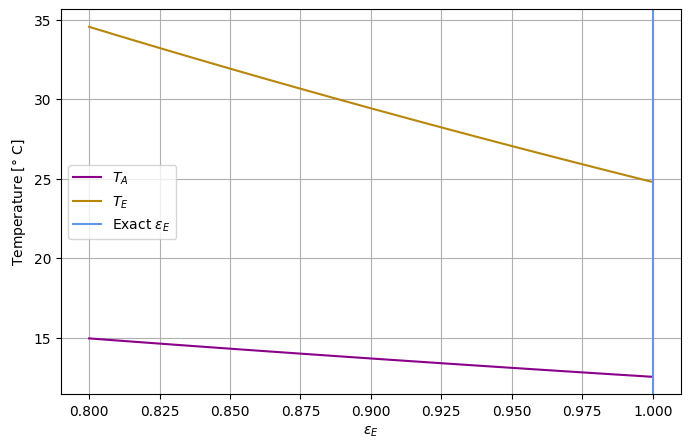

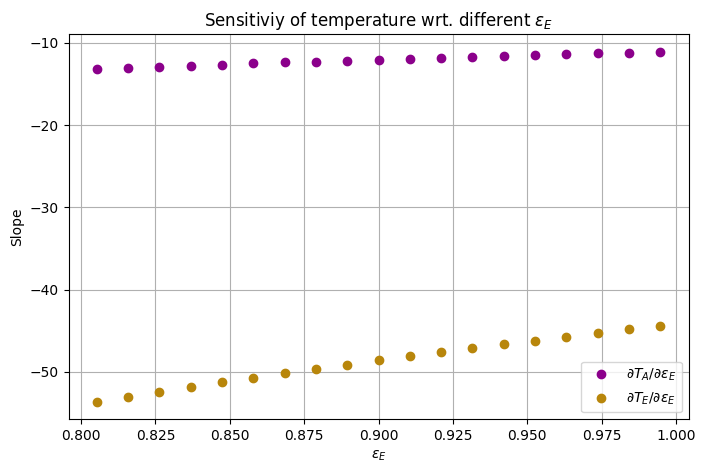

In [33]:
def sensitivityEpsilon():

    epsilonE = np.linspace(0.8,1,20)
    tempA = np.zeros_like(epsilonE)
    tempE = np.zeros_like(epsilonE)
    it = 0
    for e in epsilonE:

        def equations(vars):
            '''
            Returns the balance equations, set equal to zero
            '''
            TA, TE = vars
            eq1 = ( (1+fA)*epsilonA * sigma* TA**4 # Out: Emitted energy from atmosphere
                - (alpha + beta)*(TE - TA)      # In: Sensible heat flux and latent heat flux
                - aO3*(P0S + P2r + P6)          # In: sw energy absorbed by ozone-layer, from sun and earth reflection
                - aSW*(P2 + P6r + P4r)          # In: sw energy absorbed by greenhouse gases, from sun and earth reflection
                - aLW*e*sigma*TE**4      # In: lw energy absorbed by greenhouse gases and ozone, emitted by earth
                )

            eq2 = ( e*sigma*TE**4           # Out: lw emitted energy from earth
                + (alpha + beta)*(TE - TA)      # Out: Sensible heat flux and latent heat flux
                - epsilonA*sigma*TA**4          # In: lw emitted energy from atmosphere
                - P4                            # In: sw energy absorbed by earth
                )

            return [eq1, eq2]

        # Initial guess for x and y in Kelvin
        initial_guess = [300, 300]

        # Solve the system numerically
        solution = sp.optimize.fsolve(equations, initial_guess)
        TA, TE = solution

        tempA[it] = TA - 273
        tempE[it] = TE - 273
        it += 1
    derivA = np.zeros_like(tempA)
    derivE = np.zeros_like(tempE)
    derivEps = np.zeros_like(tempE)
    for i in range(len(tempA)-1):
        derivA[i] = (tempA[i+1] - tempA[i]) / (epsilonE[i+1] - epsilonE[i])
        derivE[i] = (tempE[i+1] - tempE[i]) / (epsilonE[i+1] - epsilonE[i])
        derivEps[i] = (epsilonE[i+1] + epsilonE[i]) /2    

    plt.plot(epsilonE, tempA, label = r"$T_A$", color = "darkmagenta")
    plt.plot(epsilonE, tempE, label = r"$T_E$", color = "darkgoldenrod")
    plt.grid()
    plt.xlabel(r"$\epsilon_E$")
    plt.ylabel(r"Temperature [$\degree$ C]")
    plt.axvline(1, label = r"Exact $\epsilon_E$", color = "cornflowerblue")
    plt.legend()
    plt.show()

    plt.plot(derivEps[:-1], derivA[:-1], 'o', label = r"$\partial T_A / \partial \epsilon_{E}$", color = "darkmagenta")
    plt.plot(derivEps[:-1], derivE[:-1], 'o',  label = r"$\partial T_E / \partial \epsilon_{E}$", color = "darkgoldenrod")
    plt.grid()
    plt.xlabel(r"$\epsilon_{E}$")
    plt.ylabel("Slope")
    plt.legend()
    plt.title(r"Sensitiviy of temperature wrt. different $\epsilon_{E}$")
    plt.show()
    

sensitivityEpsilon()

#### Sensetivity of $r_{SE}$

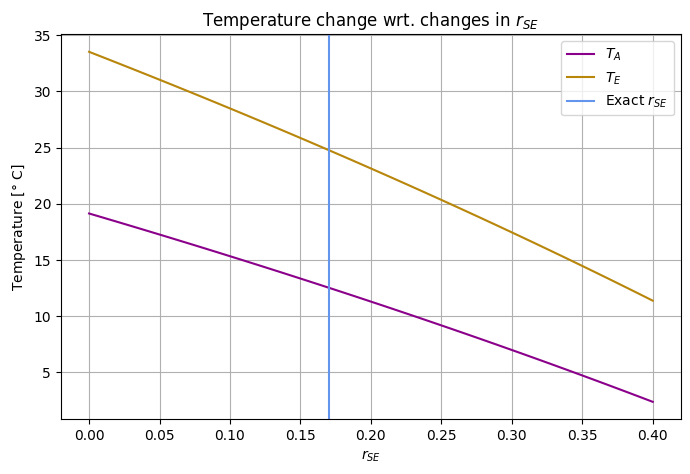

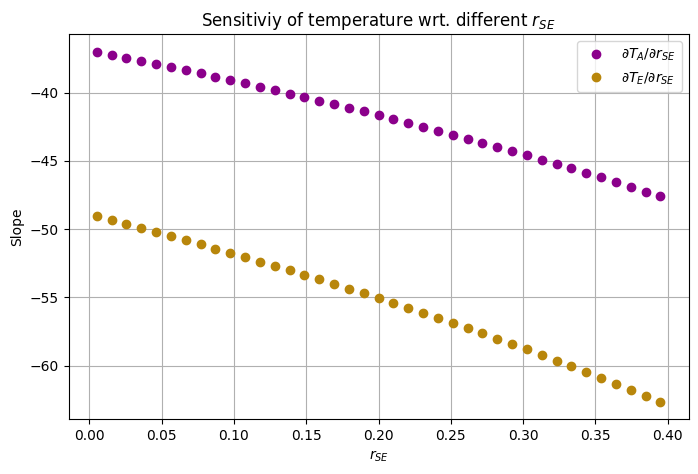

In [34]:
def sensitivityrSE():

    rSEArr = np.linspace(0,0.4,40)
    tempA = np.zeros_like(rSEArr)
    tempE = np.zeros_like(rSEArr)
    it = 0
    for r in rSEArr:

        A_clear = np.array([
    #      P0S      P1       P2       P2r       P3      P4       P4r      P5       P6       P6r      P7    
        [   1   ,    0   ,    0   ,    0   ,    0   ,    0   ,    0   ,    0   ,    0   ,    0   ,    0   ], # P0S
        [(1-aO3),   -1   ,    0   ,    0   ,    0   ,    0   ,    0   ,    0   ,    0   ,    0   ,    0   ], # P1
        [   0   , (1-rSM),   -1   ,    0   ,    0   ,    0   ,    0   ,    0   ,    0   ,    0   ,    0   ], # P2
        [   0   ,   rSM  ,    0   ,   -1   ,    0   ,    0   ,    0   ,    0   ,    0   ,    0   ,    0   ], # P2r
        [   0   ,    0   , (1-aSW),    0   ,   -1   ,    0   ,    0   ,    0   ,    0   , (1-aSW),    0   ], # P3
        [   0   ,    0   ,    0   ,    0   ,  (1-r) ,   -1   ,    0   ,    0   ,    0   ,    0   ,    0   ], # P4
        [   0   ,    0   ,    0   ,    0   ,    r   ,    0   ,   -1   ,    0   ,    0   ,    0   ,    0   ], # P4r
        [   0   ,    0   ,    0   ,    0   ,    0   ,    0   , (1-aSW),   -1   ,    0   ,    0   ,    0   ], # P5
        [   0   ,    0   ,    0   ,    0   ,    0   ,    0   ,    0   , (1-rSM),   -1   ,    0   ,    0   ], # P6
        [   0   ,    0   ,    0   ,    0   ,    0   ,    0   ,    0   ,   rSM  ,    0   ,   -1   ,    0   ], # P6r
        [   0   ,    0   ,    0   , (1-aO3),    0   ,    0   ,    0   ,    0   , (1-aO3),    0   ,   -1   ]  # P7
        ])


        P_sol = np.array([P0S, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]) # Initialize with solar constant
        P = np.linalg.solve(A_clear,P_sol) # Solve to find all P-equations
        P1, P2, P2r, P3, P4, P4r, P5, P6, P6r, P7 = P[1:] # Remove P0S, not used in further calculations


        def equations(vars):
            '''
            Returns the balance equations, set equal to zero
            '''
            TA, TE = vars
            eq1 = ( (1+fA)*epsilonA * sigma* TA**4 # Out: Emitted energy from atmosphere
                - (alpha + beta)*(TE - TA)      # In: Sensible heat flux and latent heat flux
                - aO3*(P0S + P2r + P6)          # In: sw energy absorbed by ozone-layer, from sun and earth reflection
                - aSW*(P2 + P6r + P4r)          # In: sw energy absorbed by greenhouse gases, from sun and earth reflection
                - aLW*epsilonE*sigma*TE**4      # In: lw energy absorbed by greenhouse gases and ozone, emitted by earth
                )

            eq2 = ( epsilonE*sigma*TE**4           # Out: lw emitted energy from earth
                + (alpha + beta)*(TE - TA)      # Out: Sensible heat flux and latent heat flux
                - epsilonA*sigma*TA**4          # In: lw emitted energy from atmosphere
                - P4                            # In: sw energy absorbed by earth
                )

            return [eq1, eq2]

        # Initial guess for x and y in Kelvin
        initial_guess = [300, 300]

        # Solve the system numerically
        solution = sp.optimize.fsolve(equations, initial_guess)
        TA, TE = solution

        tempA[it] = TA - 273
        tempE[it] = TE - 273
        it += 1
    derivA = np.zeros_like(tempA)
    derivE = np.zeros_like(tempE)
    derivR = np.zeros_like(tempE)
    for i in range(len(tempA)-1):
        derivA[i] = (tempA[i+1] - tempA[i]) / (rSEArr[i+1] - rSEArr[i])
        derivE[i] = (tempE[i+1] - tempE[i]) / (rSEArr[i+1] - rSEArr[i])
        derivR[i] = (rSEArr[i+1] + rSEArr[i]) /2    

    plt.plot(rSEArr, tempA, label = "$T_A$", color = "darkmagenta")
    plt.plot(rSEArr, tempE, label = "$T_E$", color = "darkgoldenrod")
    plt.grid()
    plt.axvline(0.17, color = "cornflowerblue", label = "Exact $r_{SE}$")
    plt.xlabel("$r_{SE}$")
    plt.ylabel(r"Temperature [$\degree$ C]")
    plt.legend()
    plt.title("Temperature change wrt. changes in $r_{SE}$")
    plt.show()

    plt.plot(derivR[:-1], derivA[:-1], 'o', label = r"$\partial T_A / \partial r_{SE}$", color = "darkmagenta")
    plt.plot(derivR[:-1], derivE[:-1], 'o',  label = r"$\partial T_E / \partial r_{SE}$", color = "darkgoldenrod")
    plt.grid()
    plt.xlabel("$r_{SE}$")
    plt.ylabel("Slope")
    plt.legend()
    plt.title("Sensitiviy of temperature wrt. different $r_{SE}$")
    plt.show()
    

sensitivityrSE()

### Comparison between $S(x)= 1+\frac{1}{2}S_2(3x^2-1)$ and $s(x) = \frac{4}{\pi}(1-x^2)$

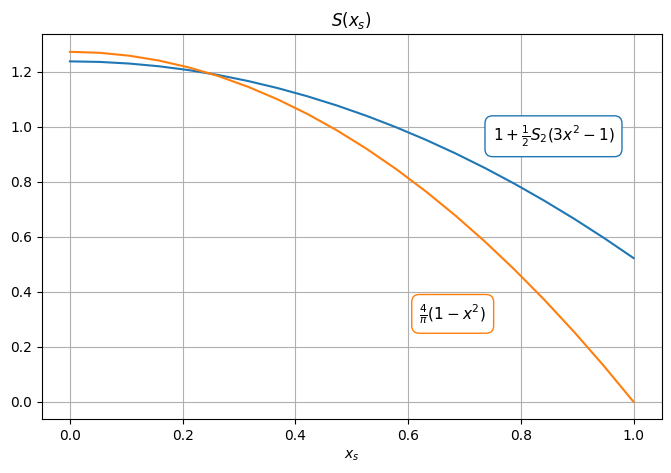

In [35]:
def S(x):
    S2 = -0.477
    return 1+S2/2*(3*x**2-1)

def s_dist(x):
    return 4/np.pi*(1-x**2)

x = np.linspace(0,1,20)

plt.rcParams["figure.figsize"] = (8,5)
plt.plot(x, S(x))
plt.plot(x, s_dist(x))
plt.title("$S(x_s)$")
plt.text(0.75, 0.95, r'$1+\frac{1}{2}S_2(3x^2-1)$',fontsize=11, bbox=dict(facecolor='white', edgecolor='#1f77b4', boxstyle='round,pad=0.5'))
plt.text(0.62, 0.3, r'$\frac{4}{\pi}(1-x^2)$', fontsize=11, bbox=dict(facecolor='white', edgecolor='#ff7f0e', boxstyle='round,pad=0.5'))
plt.xlabel("$x_s$")
plt.grid()
plt.show()

### Solving $- D \frac{\partial}{\partial x}((1 - x^2) \frac{\partial T}{\partial x}) =- I(x) + QS(x)a(x, x_s)$ numericaly (Central difference scheme)

In [36]:
def S(x, S2=-0.477):
    return 1 + S2 * 0.5 * (3*x**2 - 1)

def a(x,xS):
    return np.piecewise(x,[x>xS,x<xS],[0.38,0.68])

# Function to Create a Tridiagonal matrix with specified arrays on the diagonal
def tridiagonal_matrix(lower_diag, main_diag, upper_diag, M):
    # Check if the input arrays have the correct lengths
    if len(main_diag) != M or len(upper_diag) != (M-1) or len(lower_diag) != (M-1):
        raise ValueError("Input array lengths are not compatible with matrix size")

    # Create a tridiagonal matrix
    matrix = np.diag(main_diag) + np.diag(upper_diag, k=1) + np.diag(lower_diag, k=-1)

    return matrix

### Just to test convergence
def u_exact(x):
    return np.cos(np.pi*x)
def rhs(x):
    # Predefined values
    D = 0.3
    B_out = 1.45
    return -D*2*x*np.pi*np.sin(np.pi*x) + D*(1-x**2)*np.pi**2 * np.cos(np.pi*x) + B_out* np.cos(np.pi*x)

In [37]:
###----- Numerical solver for the question 10 -----###
def solver(M, xS, rhs=None):
    # Predefined values
    D = 0.3
    G_SC = 1360
    Q = G_SC/4
    A_out = 201.4
    B_out = 1.45

    # Initalizing domain
    h = 1/M
    x = np.linspace(0, 1, M+1)
    T = np.zeros(len(x))  # Gridpoints on the x-axis

    # Locate the index of xS in x array
    for i in range(len(x)):
        if math.isclose(x[i], xS,abs_tol=1e-6):
            index = i
            break
    ### Check if we have a right hand side unequal to the problem
    if rhs != None:
        F = rhs(x[:])
    else:
        F = - A_out + Q*S(x[:])*a(x[:], xS) 

    ### Defining diagonal elements
    alpha = D*(x[:]/h - (1-x[:]**2)/h**2)
    beta =  (2*D/h**2*(1-x[:]**2) + B_out)
    gamma = D*(-x[:]/h - (1-x[:]**2)/h**2)

    ###----- Construct the tridiagonal matrix for the 1D problem -----###
    tri_mat = tridiagonal_matrix(gamma[1:], beta[:], alpha[:-1], len(x))

    ###----- Defining boandary conditions -----###

    ### Wanted to use a central difference approx in boundary points, but solution went to negativ infinity at x=1 ###
    # tri_mat[0,1] += gamma[0]
    # tri_mat[-1,-2] += alpha[-1]
    
    ### Using forward and backward differences at Neumann boundaries
    # Set Neumann bnc at x=0
    tri_mat[0,0] = 1
    tri_mat[0,1] = -1
    F[0] = 0

    # Set Neumann bnc at x=1
    tri_mat[-1,-1] = 1
    tri_mat[-1,-2] = -1
    F[-1] = 0

    ### Forcing the Diriclet "boundary"
    # Set Diriclet bnc at x=xS
    tri_mat[index,index]=1
    tri_mat[index,index-1]=0
    tri_mat[index,index+1]=0
    F[index] = 0

    # Solve linear system
    Ti = np.linalg.solve(tri_mat,F)
    T[:] = Ti

    return T, x
###----- Functon to construct a convergence matrix for the forcing problem -----###
def convergence_matrix(tests,scheme=solver):
    h_list = np.zeros(tests)
    conv_matrix = np.zeros(tests)
    
    M=100
    for i in range(tests):
        u_sol,x = scheme(M, 0.5, rhs)
        err = np.sqrt(np.trapezoid((u_sol-u_exact(x))**2, x))
        conv_matrix[i] = err
        h_list[i] = 1/M
        M *= 2
    return conv_matrix, h_list

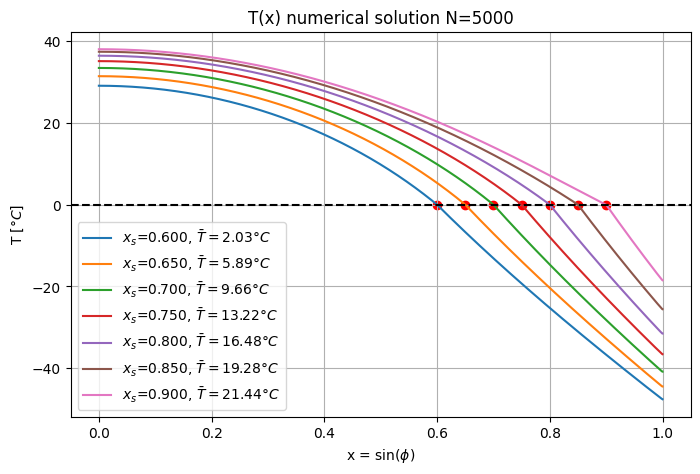

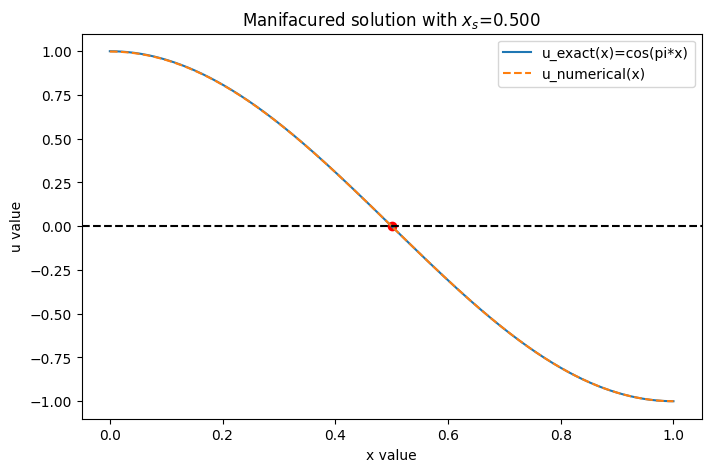

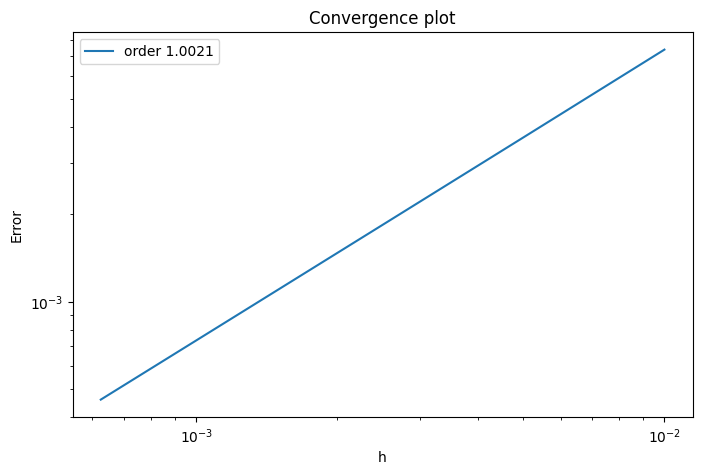

In [109]:
###----- plot numerical solutions for different xS values -----###
color_arr = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink']
xS = 0.6
M=5000
plt.rcParams["figure.figsize"] = (8,5)
for i in range(7):
    T1,x1 = solver(M, xS)
    plt.plot(x1,T1, color = color_arr[i], label = r'$x_s$' + f'={xS:.3f}, ' +r'$\bar{T}=$'+f'{np.mean(T1):.2f}'+r"$\degree C$")
    plt.scatter(xS, 0, color = 'r')
    xS += 1/20
plt.axhline(0, color = 'black', linestyle  = '--')
plt.title(f'T(x) numerical solution N={M}')
plt.xlabel(r'x = sin($\phi$)')
plt.ylabel('T [$\N{DEGREE SIGN}C$]')
plt.grid(True)
plt.legend()
plt.show()

###----- plot numerical solutions for different xS=0.5 and forcing using a known solution cos(pi*x) -----###
M=1000
xS = 0.5
T2,x2 = solver(M, xS, rhs)
plt.plot(x2, u_exact(x2), label = f'u_exact(x)=cos(pi*x)')
plt.plot(x2,T2, linestyle  = '--', label = f'u_numerical(x)')
plt.scatter(xS, 0, color = 'r')

plt.axhline(0, color = 'black', linestyle  = '--')
plt.title(f'Manifacured solution with ' + r'$x_s$' + f'={xS:.3f}')
plt.xlabel('x value')
plt.ylabel('u value')
plt.legend()
plt.show()

###----- Convergence plot for the scheme using a known solution cos(pi*x) -----###
conv_matrix, h_list = convergence_matrix(5,scheme=solver)

slope, intercept = np.polyfit(np.log(h_list), np.log(conv_matrix), 1)
plt.loglog(h_list, conv_matrix, label=f'order {abs(slope):.4f}')
plt.title('Convergence plot')
plt.xlabel('h')
plt.ylabel('Error')
plt.legend()
plt.show()

### Solving $Q(x_s)$ and ploting the analytical solution to $- D \frac{\partial}{\partial x}((1 - x^2) \frac{\partial T}{\partial x}) =- I(x) + QS(x)a(x, x_s)$

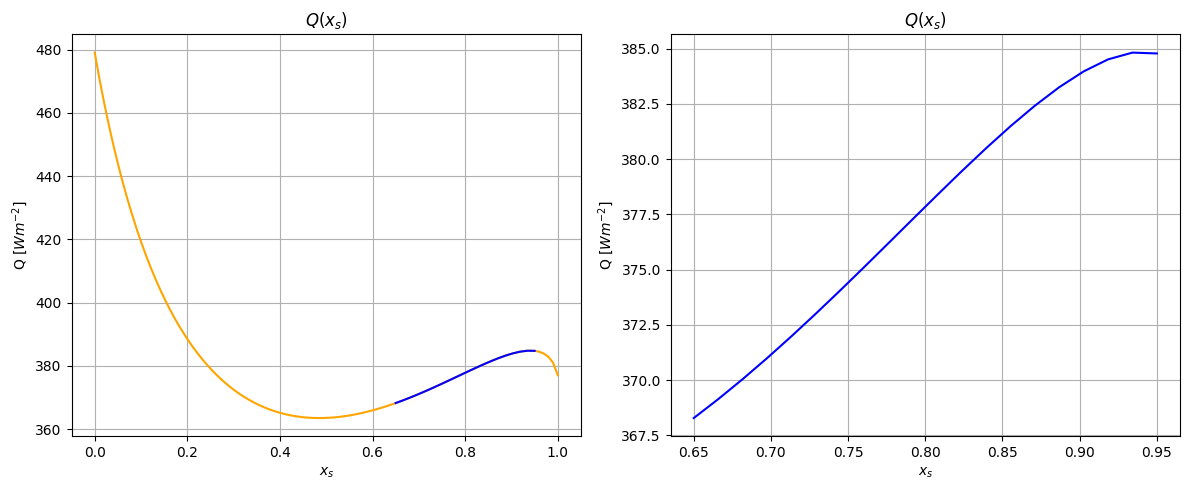

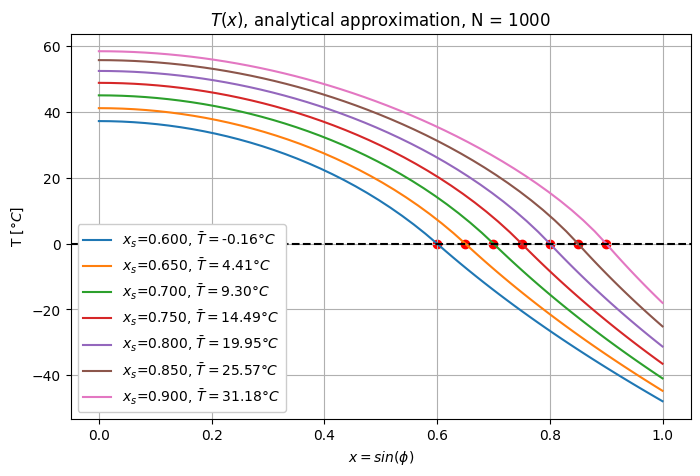

In [110]:
# Constants
A = 201.4 
B = 1.45
D = 0.3
S2 = -0.477
alpha_u = 0.38
alpha_l = 0.68
N = 1000

def P2(x):
    return 1/2*(3*x**2-1)
    
def y_p(x):
    # uten b0!
    b0 =  1 
    b1 = B/(2*D)*b0
    b2 = (1/2+B/(4*D))*b1
    
    y_p = b0+b1*(1-x)+b2*(1-x)**2
    b = b2
    for n in range(2,N):
        b_ny = b/(2*(n+1)**2) * (n*(n-1)+2*n+B/D) 
        y_p += b_ny*(1-x)**(n+1)
        b = b_ny
        
    return y_p

def y_p_deriv(x):
    # uten b0!
    b0 =  1 #Sette inn riktig uttrykk!
    b1 = B/(2*D)*b0
    b2 = (1/2+B/(4*D))*b1
    
    y_p = -b1-2*b2*(1-x)
    b = b2
    for n in range(2,N):
        b_ny = b/(2*(n+1)**2) * (n*(n-1)+2*n+B/D) 
        y_p -= (n+1)*b_ny*(1-x)**(n)
        b = b_ny
        
    return y_p    

def y_m(x):
    #uten a0!
    a0 = 1
    a2 = B/(2*D)*a0
    
    y_m = a0 + a2*x**2
    a = a2
    for n in range(1,N):
        a_ny = a*(2*n*(2*n-1)+4*n+B/D)/((2*n+2)*(2*n+1))
        y_m += a_ny*x**(2*n+2)
        a = a_ny
    return y_m
        
def y_m_deriv(x):
    #uten a0!
    a0 = 1
    a2 = B/(2*D)*a0
    
    y_m = 2*a2*x
    a = a2
    for n in range(1,N):
        a_ny = a/((2*n+2)*(2*n+1)) * (2*n*(2*n-1)+4*n+B/D)
        y_m += (2*n+2)*a_ny*x**(2*n+1)
        a = a_ny
    return y_m


# def b0_hat(xs):
#     b0_hat = (alpha_u-alpha_l)*(1/B+S2/(6*D+B))*y_m_deriv(xs)/(y_p_deriv(xs)*y_m(xs)-y_m_deriv(xs)*y_p(xs))
#     b0_hat += 3*xs*S2*(alpha_l-alpha_u)/((6*D+B)*y_p_deriv(xs))
#     return b0_hat

def b0_hat(xs):
    diff1 = (alpha_u-alpha_l)*(1/B+S2*P2(xs)/(6*D+B))
    diff2 = S2*(alpha_l-alpha_u)/(6*D+B)*3*xs
    
    b0_hat = y_m_deriv(xs)*diff1/y_m(xs)+diff2
    b0_hat*= 1/(y_p_deriv(xs)-y_p(xs)*y_m_deriv(xs)/y_m(xs))
    return b0_hat
def a0_hat(xs):
    diff1 = (alpha_u-alpha_l)*(1/B+S2*P2(xs)/(6*D+B))
    a0_hat = (b0_hat(xs)*y_p(xs)+diff1)*1/y_m(xs)
    return a0_hat

    
    
def Q(xs):
    Q = (A/B)/(alpha_u/B+b0_hat(xs)*y_p(xs)+S2*alpha_u*P2(xs)/(6*D+B))
    return Q


# ------------------- Q(xs) ------------------------
xs = np.linspace(0, 1, 100)
xs_small = np.linspace(0.65,0.95, 20)
# Plot
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plt.plot(xs, Q(xs), color = 'orange')
plt.plot(xs_small, Q(xs_small), color = 'blue')
plt.title("$Q(x_s)$")
plt.ylabel("Q $[Wm^{-2}]$")
plt.xlabel("$x_s$")
plt.grid()

plt.subplot(1,2,2)
plt.plot(xs_small, Q(xs_small), color = 'blue')
plt.title("$Q(x_s)$")
plt.ylabel("Q $[Wm^{-2}]$")
plt.xlabel("$x_s$")
plt.grid()

plt.tight_layout()
plt.show()

# -------------------- T -------------------------
def T_p(x, xs):
    T0 = (Q(xs)*alpha_u-A)/B
    T2 = S2*Q(xs)*alpha_u/(6*D+B)
    tp = T0+T2*P2(x)
    return b0_hat(xs)*Q(xs)*y_p(x)+tp

def T_m(x, xs):
    T0 = (Q(xs)*alpha_l-A)/B
    T2 = S2*Q(xs)*alpha_l/(6*D+B)
    tp = T0+T2*P2(x)
    return a0_hat(xs)*Q(xs)*y_m(x) +tp 
    

xs_arr= np.array([0.600, 0.650, 0.700, 0.750, 0.800, 0.850, 0.900])
color_arr = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink']
zeros = np.zeros(len(xs_arr))
n = 50
i = 0
plt.rcParams["figure.figsize"] = (8,5)
for xs in xs_arr:
    x1 = np.linspace(0,xs,int(n*xs))
    x2 = np.linspace(xs,1, int(n*xs))
    plt.plot(x2, T_p(x2,xs), color = color_arr[i], label = r'$x_s$' + f'={xs:.3f}, ' +r'$\bar{T}=$'+f'{(np.mean(np.mean( T_p(x2,xs))+np.mean( T_m(x1,xs)))):.2f}'+r"$\degree C$")
    plt.plot(x1, T_m(x1,xs), color = color_arr[i])
    i+=1
plt.axhline(0, color='black', linestyle = '--')
plt.scatter(xs_arr,zeros, color='red')
plt.title(f"$T(x)$, analytical approximation, N = {N}")
plt.xlabel(r"$x = sin(\phi)$")
plt.ylabel(r"T $[\degree C]$")
plt.grid()
plt.legend(framealpha = 1)
plt.show()

### Stability check for $\frac{\partial \delta T}{\partial t} = M(\delta T)$

In [131]:
import numpy as np

# Parameters
N = 10 # Size is N+1
B = 1.45
D = 0.3

def tridiag(i,j, x, h, B, D):
    '''
    Function to create the tridiagonal entries of the matrix M
    ------------------------------------------

    Input:
    i,j: row and column indices
    x: grid
    h: step size
    B, D: parameters

    Output:
    M[i,j]: value of the matrix at position i,j
    '''
    if i == j: # Main diagonal
        return -B-D*(2*(1-x[i]**2))/h**2
    elif i == j+1: # Lower diagonal, use i
        return D*(x[i]/h+(1-x[i]**2)/h**2)
    elif i == j-1: # Upper diagonal, use j
        return D*(-x[j]/h+(1-x[j]**2)/h**2)
    else:
        return 0
    
def createM(N, B, D):
    '''
    Function to create the tridiagonal matrix M
    ------------------------------------------
    Input:
    N: number of grid points
    B, D: parameters

    Output:
    M: tridiagonal matrix
    '''
    M = np.zeros((N+1, N+1))
    x = np.linspace(0, 1, N+1)
    h = 1/N
    for i in range(N+1): # rows
        for j in range(N+1): # columns
            M[i, j] = tridiag(i, j, x, h, B, D)

    return M

M = createM(N, B, D)

eigvals, eigvecs = np.linalg.eig(M) 

# Test for stability, check if any eigenvalues are positive
if any (eigvals > 0):
    print(eigvals)
    print('The problem is unstable')
else:
    print('The problem is stable')


The problem is stable
